# Predicción 2022 CLV

## Contenido
* Cargar data
* Separar 2 series de tiempo (hogar y pospago)
* Ejecutar los 3 métodos validados con intervalo de confianza
* Exportar resultados
* Graficar resultados

In [3]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#carga de los datos
TablaBase=pd.read_csv(f'BasePron.csv',sep=';')

In [4]:
TablaBase.sample(10)

,fecha,Variable,valor,linea,fecha2
21,1/5/2020,Churn estimado,0.022,pospago,2020-05-01
35,1/8/2020,Total clientes,5488478.000,pospago,2020-08-01
157,1/10/2020,ARPU,92383.027,hogares,2020-10-01
215,1/10/2021,Total clientes,3025784.000,hogares,2021-10-01
17,1/4/2020,ARPU,48545.443,pospago,2020-04-01
46,1/10/2020,Churn estimado,0.022,pospago,2020-10-01
146,1/8/2020,Churn estimado,0.021,hogares,2020-08-01
117,1/2/2020,ARPU,52146.781,hogares,2020-02-01
18,1/4/2020,CLV TOTAL,6102416018269.380,pospago,2020-04-01
51,1/11/2020,Churn estimado,0.021,pospago,2020-11-01


##  Preprocesamiento

In [5]:
TablaBase.set_index('fecha2',inplace=True)

In [6]:
TablaBase.index=pd.to_datetime(TablaBase.index)

In [7]:
#seleccionar una serie
SeriePospago=TablaBase[(TablaBase['linea']=='pospago')&(TablaBase['Variable']=='CLV TOTAL')]
SerieHogar=TablaBase[(TablaBase['linea']=='hogares')&(TablaBase['Variable']=='CLV TOTAL')]

In [8]:
SeriePospago

,fecha,Variable,valor,linea
fecha2,,,,
2020-01-01,1/1/2020,CLV TOTAL,5931665961459.650,pospago
2020-02-01,1/2/2020,CLV TOTAL,5970123554537.230,pospago
2020-03-01,1/3/2020,CLV TOTAL,5958333091532.760,pospago
2020-04-01,1/4/2020,CLV TOTAL,6102416018269.380,pospago
2020-05-01,1/5/2020,CLV TOTAL,6191995189538.440,pospago
2020-06-01,1/6/2020,CLV TOTAL,5818946656850.870,pospago
2020-07-01,1/7/2020,CLV TOTAL,6311288093008.480,pospago
2020-08-01,1/8/2020,CLV TOTAL,6279812651511.310,pospago
2020-09-01,1/9/2020,CLV TOTAL,6319768039902.310,pospago


In [9]:
ind = pd.date_range(SeriePospago.index.max(), periods = 15, freq ='MS', name='FECHA')[1:]
ind

DatetimeIndex(['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='FECHA', freq='MS')

## Modelos
* Se prueban 3 modelos
 * Dado que se tiene menos de 2 años de historia varios modelos no permiten estacionalidad de 12 periodos
1. Sarimax, con estacionalidad 4
2. Sarimax, con estacionalidad 12 y cambio de hiperparámetros
3. Forecast ETS

In [33]:
Resultado = pd.DataFrame()

# 1. Sarimax, con estacionalidad 4

In [34]:
model1_Hogar=sm.tsa.statespace.SARIMAX(SerieHogar['valor'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
model1_Hogar=model1_Hogar.fit()
pred1_Hogar=model1_Hogar.get_forecast(14)
dfAux=pred1_Hogar.predicted_mean.to_frame()
dfAux=dfAux.merge(pred1_Hogar.conf_int(0.25),left_index=True,right_index=True, how='left')
#dfAux
dfAux.columns=['pred','min','max']
dfAux['linea']='hogar'
dfAux['metodo']='samimax_4'
Resultado=dfAux

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

In [35]:
model1_Pospago=sm.tsa.statespace.SARIMAX(SeriePospago['valor'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
model1_Pospago=model1_Pospago.fit()
pred1_Pospago=model1_Pospago.get_forecast(14)
dfAux=pred1_Pospago.predicted_mean.to_frame()
dfAux=dfAux.merge(pred1_Pospago.conf_int(0.25),left_index=True,right_index=True, how='left')
dfAux.columns=['pred','min','max']
dfAux['linea']='pospago'
dfAux['metodo']='samimax_4'
Resultado=Resultado.append(dfAux)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


# 2. Sarimax, estacionalidad 12
##### (ajustes hiperparámetros)

In [36]:
model2_Hogar = sm.tsa.SARIMAX(SerieHogar['valor'],seasonal_order=(1,1,0,12))
model2_Hogar = model2_Hogar.fit()
pred2_Hogar = model2_Hogar.get_forecast(14)
dfAux=pred2_Hogar.predicted_mean.to_frame()
dfAux=dfAux.merge(pred2_Hogar.conf_int(0.25),left_index=True,right_index=True, how='left')
dfAux.columns=['pred','min','max']
dfAux['linea']='hogar'
dfAux['metodo']='samimax_12'
Resultado=Resultado.append(dfAux)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [37]:
model2_Pospago = sm.tsa.SARIMAX(SeriePospago['valor'],seasonal_order=(0,1,0,12))
model2_Pospago = model2_Pospago.fit()
pred2_Pospago = model2_Pospago.get_forecast(14)
dfAux=pred2_Pospago.predicted_mean.to_frame()
dfAux=dfAux.merge(pred2_Pospago.conf_int(0.25),left_index=True,right_index=True, how='left')
dfAux.columns=['pred','min','max']
dfAux['linea']='pospago'
dfAux['metodo']='samimax_12'
Resultado=Resultado.append(dfAux)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


# 3. ETS,  estacionalidad 10

In [38]:
model3_Hogar = ETSModel(SerieHogar['valor'],seasonal_periods=11,error="mul",trend="mul",seasonal="mul", damped_trend=True,)
model3_Hogar = model3_Hogar.fit()
pred3_Hogar = model3_Hogar.get_prediction(start=22, end=22+13)
dfAux=pred3_Hogar.summary_frame(alpha=0.25)
dfAux.drop(columns=['mean_numerical'], inplace=True)
dfAux.columns=['pred','min','max']
dfAux['linea']='hogar'
dfAux['metodo']='ETS_10'
Resultado=Resultado.append(dfAux)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [39]:
model3_Pospago = ETSModel(SeriePospago['valor'],seasonal_periods=11,error="mul",trend="mul",seasonal="mul", damped_trend=True,)
model3_Pospago = model3_Pospago.fit()
pred3_Pospago = model3_Pospago.get_prediction(start=22, end=22+13)
#pred3_Hogar.predicted_mean
dfAux=pred3_Pospago.summary_frame(alpha=0.25)
dfAux.drop(columns=['mean_numerical'], inplace=True)
dfAux.columns=['pred','min','max']
dfAux['linea']='pospago'
dfAux['metodo']='ETS_10'
Resultado=Resultado.append(dfAux)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


## Guardar resultado

In [40]:
Resultado

,pred,min,max,linea,metodo
2021-11-01,6792784882367.606,6422206481677.084,7163363283058.129,hogar,samimax_4
2021-12-01,6634388111833.646,6119355085272.916,7149421138394.375,hogar,samimax_4
2022-01-01,6719753702722.531,6091542238160.990,7347965167284.072,hogar,samimax_4
2022-02-01,7042302877199.870,6318556046860.709,7766049707539.031,hogar,samimax_4
2022-03-01,7396361411139.197,6367941717526.736,8424781104751.658,hogar,samimax_4
...,...,...,...,...,...
2022-08-01,6256946064072.048,5881666838852.764,6665983033124.730,pospago,ETS_10
2022-09-01,6252373603433.616,5850694486710.351,6685581078264.977,pospago,ETS_10
2022-10-01,6226979381751.732,5807244238597.790,6680027595990.355,pospago,ETS_10
2022-11-01,6255517622987.365,5805112427711.835,6767500821651.414,pospago,ETS_10


In [47]:
Resultado.to_csv('resultado.csv', sep=';')

## Revisión Visual

In [42]:
#del fig
#del ax

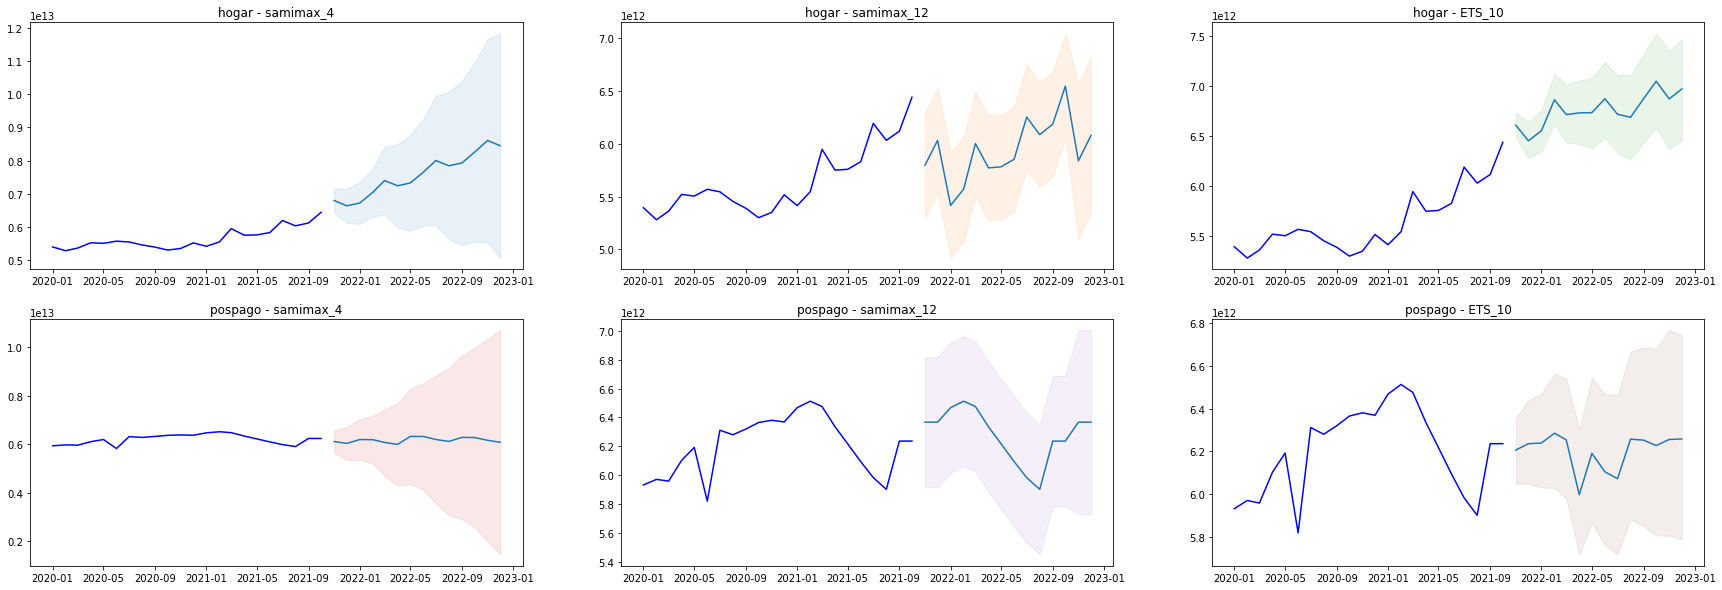

In [43]:
fig, ax = plt.subplots(2,3,figsize=(30,10))
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='samimax_4')]
ax[0,0].plot(SerieHogar.index,SerieHogar['valor'], color='b')
ax[0,0].plot(auxDf.index,auxDf['pred'])
ax[0,0].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C0', alpha=.1)
ax[0,0].set_title('hogar - samimax_4')
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='samimax_12')]
ax[0,1].plot(SerieHogar.index,SerieHogar['valor'], color='b')
ax[0,1].plot(auxDf.index,auxDf['pred'])
ax[0,1].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C1', alpha=.1)
ax[0,1].set_title('hogar - samimax_12')
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='ETS_10')]
ax[0,2].plot(SerieHogar.index,SerieHogar['valor'], color='b')
ax[0,2].plot(auxDf.index,auxDf['pred'])
ax[0,2].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C2', alpha=.1)
ax[0,2].set_title('hogar - ETS_10')
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='samimax_4')]
ax[1,0].plot(SeriePospago.index,SeriePospago['valor'], color='b')
ax[1,0].plot(auxDf.index,auxDf['pred'])
ax[1,0].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C3', alpha=.1)
ax[1,0].set_title('pospago - samimax_4')
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='samimax_12')]
ax[1,1].plot(SeriePospago.index,SeriePospago['valor'], color='b')
ax[1,1].plot(auxDf.index,auxDf['pred'])
ax[1,1].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C4', alpha=.1)
ax[1,1].set_title('pospago - samimax_12')
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='ETS_10')]
ax[1,2].plot(SeriePospago.index,SeriePospago['valor'], color='b')
ax[1,2].plot(auxDf.index,auxDf['pred'])
ax[1,2].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C5', alpha=.1)
ax[1,2].set_title('pospago - ETS_10')
plt.show()

In [44]:
#Resultado.plot()

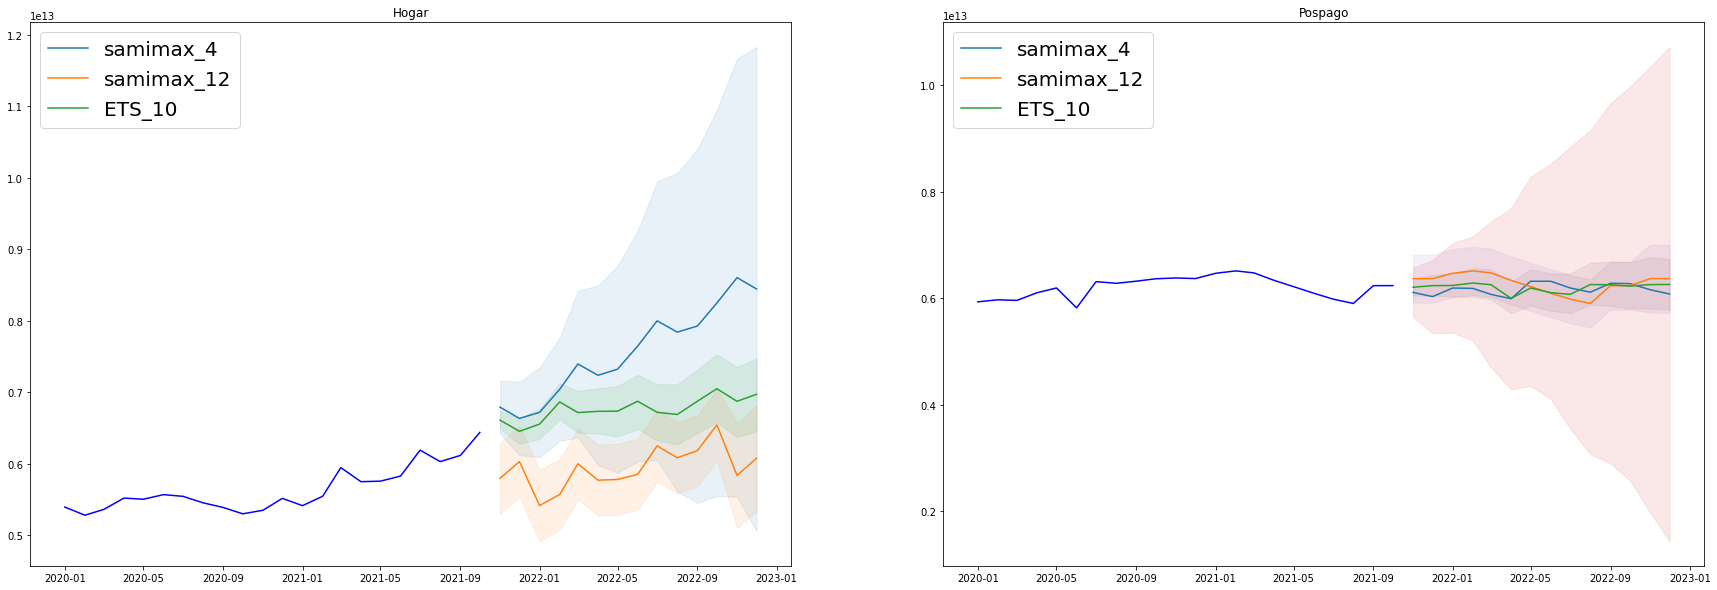

In [45]:
fig, ax = plt.subplots(1,2,figsize=(30,10))
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='samimax_4')]
ax[0].plot(SerieHogar.index,SerieHogar['valor'], color='b')
ax[0].plot(auxDf.index,auxDf['pred'], label='samimax_4')
ax[0].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C0', alpha=.1)
ax[0].set_title('Hogar')
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='samimax_12')]
ax[0].plot(auxDf.index,auxDf['pred'], label='samimax_12')
ax[0].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C1', alpha=.1)
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='ETS_10')]
ax[0].plot(auxDf.index,auxDf['pred'], label='ETS_10')
ax[0].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C2', alpha=.1)
ax[0].legend(loc="upper left", prop={'size': 20})
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='samimax_4')]
ax[1].plot(SeriePospago.index,SeriePospago['valor'], color='b')
ax[1].plot(auxDf.index,auxDf['pred'], label='samimax_4')
ax[1].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C3', alpha=.1)
ax[1].set_title('Pospago')
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='samimax_12')]
ax[1].plot(auxDf.index,auxDf['pred'], label='samimax_12')
ax[1].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C4', alpha=.1)
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='ETS_10')]
ax[1].plot(auxDf.index,auxDf['pred'], label='ETS_10')
ax[1].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C5', alpha=.1)
ax[1].legend(loc="upper left", prop={'size': 20})
plt.show()

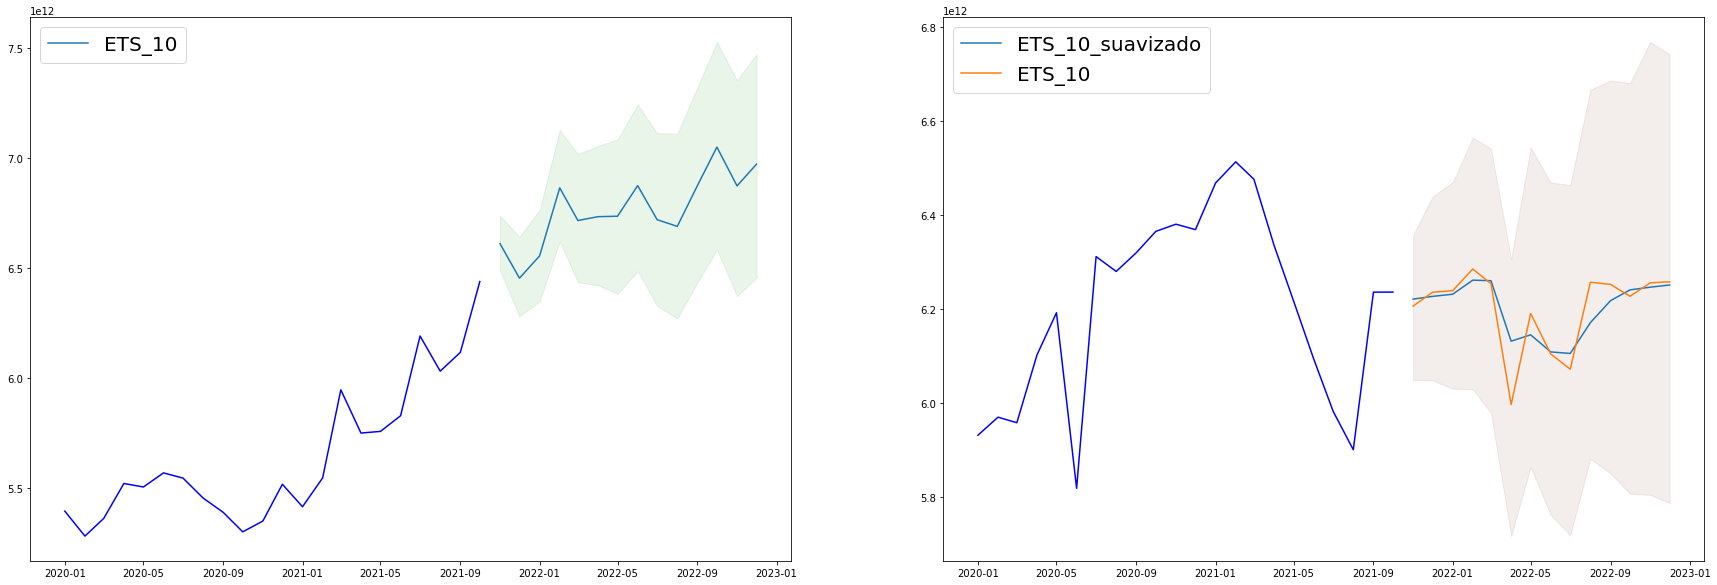

In [65]:
fig, ax = plt.subplots(1,2,figsize=(30,10))
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='samimax_4')]
ax[0].plot(SerieHogar.index,SerieHogar['valor'], color='b')
auxDf=Resultado[(Resultado['linea']=='hogar')&(Resultado['metodo']=='ETS_10')]
ax[0].plot(auxDf.index,auxDf['pred'], label='ETS_10')
ax[0].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C2', alpha=.1)
ax[0].legend(loc="upper left", prop={'size': 20})
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='samimax_4')]
ax[1].plot(SeriePospago.index,SeriePospago['valor'], color='b')
auxDf=Resultado[(Resultado['linea']=='pospago')&(Resultado['metodo']=='ETS_10')]
#suavizado
aux=SeriePospago[['valor']].append(auxDf[['pred']]).fillna(0)
aux['valorComp']=aux['valor']+aux['pred']
aux['suav']=aux['valorComp']*0.5+aux['valorComp'].shift(1)*0.3+aux['valorComp'].shift(2)*0.2
aux=aux[aux.index >= Resultado.index.min()][['suav']]
ax[1].plot(aux.index,aux['suav'], label='ETS_10_suavizado')
ax[1].plot(auxDf.index,auxDf['pred'], label='ETS_10')
ax[1].fill_between(auxDf.index, auxDf['min'], auxDf['max'], color='C5', alpha=.1)
ax[1].legend(loc="upper left", prop={'size': 20})
plt.show()

In [50]:
p=[10,11,12]
dfp=pd.DataFrame(p)
dfp

,0
0,10
1,11
2,12


In [53]:
dfp['s']=dfp[0]*0.5+dfp[0].shift(1)*0.3+dfp[0].shift(2)*0.2

In [54]:
dfp

,0,s
0,10,NaN
1,11,NaN
2,12,11.300


In [62]:
aux=SeriePospago[['valor']].append(auxDf[['pred']]).fillna(0)
aux['valorComp']=aux['valor']+aux['pred']
aux['suav']=aux['valorComp']*0.5+aux['valorComp'].shift(1)*0.3+aux['valorComp'].shift(2)*0.2
aux[aux.index >= Resultado.index.min()][['suav']]

,suav
2021-11-01,6220959186434.712
2021-12-01,6226802992343.363
2022-01-01,6231367676558.091
2022-02-01,6261283973859.741
2022-03-01,6260100232086.921
2022-04-01,6131612630010.700
2022-05-01,6145134457530.389
2022-06-01,6108791863176.791
2022-07-01,6105478373620.153
2022-08-01,6170979013510.021


### Caso Jefe Marketing

In [12]:
portaciones=[134129,141020,129298,143512,190507,218410,288330,291579,304452]
nuevo_p_mig=[85239,93882,88246,118353,153289,177472,223368,228446,237202]

In [16]:
for i in portaciones:
    print(i/2)

67064.5
70510.0
64649.0
71756.0
95253.5
109205.0
144165.0
145789.5
152226.0


In [17]:
portaciones=[67064.5,67064.5,
70510.0,70510.0,
64649.0,64649.0,
71756.0,71756.0,
95253.5,95253.5,
109205.0,109205.0,
144165.0,144165.0,
145789.5,145789.5,
152226.0,152226.0]
nuevo_p_mig=[85239,93882,88246,118353,153289,177472,223368,228446,237202]

In [20]:
len(portaciones)

18

In [33]:
portaciones_df=pd.DataFrame(portaciones)

In [51]:
portaciones_df

,0
0,67064.5
1,67064.5
2,70510.0
3,70510.0
4,64649.0
5,64649.0
6,71756.0
7,71756.0
8,95253.5
9,95253.5


In [52]:
model_port_1 = ETSModel(portaciones_df[0],seasonal_periods=6,error="add",trend="add",seasonal="add", damped_trend=True,)

In [53]:
model_port_1 = model_port_1.fit()

In [61]:
pred = model_port_1.get_prediction(start=18, end=51)

In [62]:
dfAux=pred.summary_frame(alpha=0.05)

In [63]:
dfAux

,mean,pi_lower,pi_upper
18,170359.251695,147411.532176,193306.971215
19,163450.822110,136681.003302,190220.640918
20,169711.171135,139599.959518,199822.382753
21,171793.180081,138675.470274,204910.889888
22,178644.809668,142771.206558,214518.412778
23,180130.405824,141697.575343,218563.236306
24,197705.435495,152939.464725,242471.406265
25,190250.082233,143407.517385,237092.647081
26,195974.446056,147143.185850,244805.706263
27,197531.189504,146788.803177,248273.575830


In [64]:
dfAux.reset_index(inplace=True)

In [65]:
dfAux['bimes']=dfAux['index']//2

In [66]:
dfAux.groupby('bimes').sum()

,index,mean,pi_lower,pi_upper
bimes,,,,
9,37,333810.073805,284092.535478,383527.612133
10,41,341504.351216,278275.429792,404733.272640
11,45,358775.215492,284468.781900,433081.649084
12,49,387955.517728,296346.982110,479564.053346
13,53,393505.635560,293931.989027,493079.282093
14,57,408717.248976,301768.545750,515665.952202
15,61,435919.846686,316299.163449,555540.529922
16,65,439570.577091,313741.621790,565399.532392
17,69,452958.018822,321211.494061,584704.543583


In [ ]:
19.000.000   ()